## <center>Topic : Classification of different categories of customers

#### Presented By:  

>Sanket Andalkar <br>
Rushikesh Pawar<br>
Santosh Waghmode<br>
Rutuja Balak<br>

### Introduction:
Customer segmentation is the practice of dividing a customer base into groups of individuals that are similar in specific ways relevant to marketing, such as age, gender, interests and spending habits.<br>

Companies employing customer segmentation operate under the fact that every customer is different and that their marketing efforts would be better served if they target specific, smaller groups with messages that those consumers would find relevant and lead them to buy something. Companies also hope to gain a deeper understanding of their customers' preferences and needs with the idea of discovering what each segment finds most valuable to more accurately tailor marketing materials toward that segment.

##### Data source :
We got this data from kaggle website.

##### Variables :
Dependent variable: Var_1<br>
Independent variables: Gender, Ever_Married, Age, Graduated, Profession, Work_Experience, Spending_Score, Family_Size<br>

Gender : Gender of customer<br>
Ever_Married : Marital status of the customer<br>
Age : Age of customer<br>
Graduated : Is the customer a graduate?<br>
Profession : Profession of the custome<br>
Work_Experience : Work Experience in years<br>
Spending_Score : Spending Score<br>
Family_Size : Family Size of customer<br>

#### Objective :
To Classify different catagories of customers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv("train.csv")
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [3]:
test=pd.read_csv("test.csv")
test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [4]:
df=df.drop(columns=["Segmentation","ID"])

In [5]:
df.shape

(8068, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Var_1            7992 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 567.4+ KB


In [7]:
df.isna().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
dtype: int64

In [8]:
df.Profession.unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)

In [9]:
for i in range(0,df.shape[0]):
    if df["Graduated"].isna()[i]==True:
        if df.Profession[i] in ['Healthcare','Engineer','Lawyer','Executive','Doctor','Marketing']:
            df.Graduated[i]="Yes"
        else:
            df.Graduated[i]="No"

<ipython-input-9-e3bf2efb678e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Graduated[i]="Yes"
<ipython-input-9-e3bf2efb678e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Graduated[i]="No"


In [10]:
m=df.Family_Size.mode()
df["Family_Size"]=df.Family_Size.fillna(m[0])

In [11]:
df.isna().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated            0
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size          0
Var_1               76
dtype: int64

In [12]:
df=df.dropna()

In [13]:
df.isna().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

In [14]:
df.shape

(6962, 9)

In [15]:
professions=df["Profession"].unique()

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])
df["Ever_Married"]=le.fit_transform(df["Ever_Married"])
df["Graduated"]=le.fit_transform(df["Graduated"])
df["Profession"]=le.fit_transform(df["Profession"])
df["Spending_Score"]=le.fit_transform(df["Spending_Score"])
df["Var_1"]=le.fit_transform(df["Var_1"])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6962 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           6962 non-null   int32  
 1   Ever_Married     6962 non-null   int32  
 2   Age              6962 non-null   int64  
 3   Graduated        6962 non-null   int32  
 4   Profession       6962 non-null   int32  
 5   Work_Experience  6962 non-null   float64
 6   Spending_Score   6962 non-null   int32  
 7   Family_Size      6962 non-null   float64
 8   Var_1            6962 non-null   int32  
dtypes: float64(2), int32(6), int64(1)
memory usage: 380.7 KB


In [19]:
test.isna().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [20]:
for i in range(0,test.shape[0]):
    if test["Graduated"].isna()[i]==True:
        if test.Profession[i] in ['Healthcare','Engineer','Lawyer','Executive','Doctor','Marketing']:
            test.Graduated[i]="Yes"
        else:
            test.Graduated[i]="No"

<ipython-input-20-9f61fcc28a79>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.Graduated[i]="No"
<ipython-input-20-9f61fcc28a79>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.Graduated[i]="Yes"


In [21]:
test.isna().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated            0
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [22]:
m=test.Family_Size.mode()
test["Family_Size"]=test.Family_Size.fillna(m[0])

In [23]:
test=test.dropna()

In [24]:
test.isna().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

In [25]:
le=LabelEncoder()
test["Gender"]=le.fit_transform(test["Gender"])
test["Ever_Married"]=le.fit_transform(test["Ever_Married"])
test["Graduated"]=le.fit_transform(test["Graduated"])
test["Profession"]=le.fit_transform(test["Profession"])
test["Spending_Score"]=le.fit_transform(test["Spending_Score"])
test["Var_1"]=le.fit_transform(test["Var_1"])

## EDA

In [26]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,1,0,22,0,5,1.0,2,4.0,3
2,0,1,67,1,2,1.0,2,1.0,5
3,1,1,67,1,7,0.0,1,2.0,5
5,1,1,56,0,0,0.0,0,2.0,5
6,1,0,32,1,5,1.0,2,3.0,5


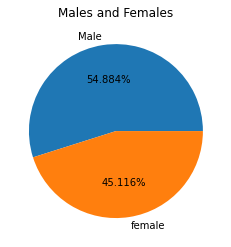

In [27]:
f=len(df[df.Gender==0])
m=len(df[df.Gender==1])
plt.pie([m,f],labels=["Male","female"],autopct="%1.3f%%")
plt.title('Males and Females');

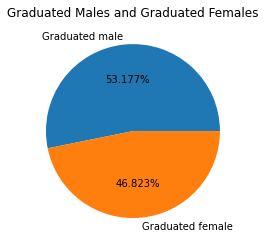

In [28]:
no_of_male=len(df[(df["Gender"]==1)&(df["Graduated"]==1)])
no_of_female=len(df[(df["Gender"]==0)&(df["Graduated"]==1)])

plt.pie([no_of_male,no_of_female],labels=["Graduated male","Graduated female"],autopct="%1.3f%%");
plt.title('Graduated Males and Graduated Females');

Dataset contains 53 % Graduated males and 46% Graduated females.

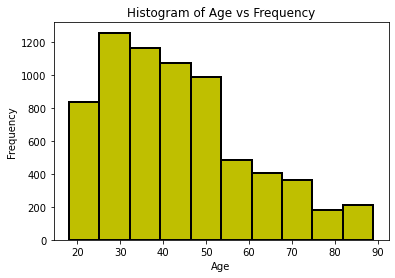

In [29]:
plt.hist(df.Age,color='y',edgecolor='k',linewidth=2)
plt.title("Histogram of Age vs Frequency")
plt.style.use("ggplot")
plt.xlabel('Age')
plt.ylabel('Frequency');


In dataset maximum number of peoples are of 20 to 50 Age group.

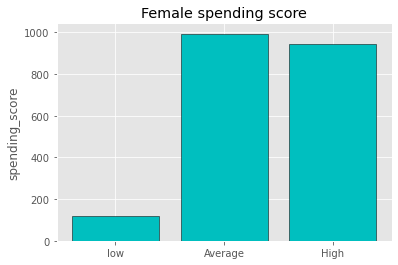

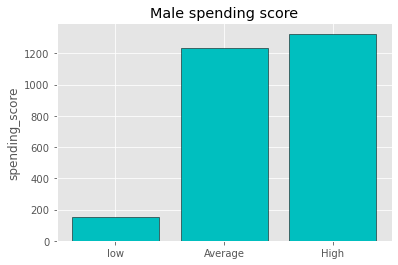

In [30]:
f_0=len(df[(df.Gender==0)&(df.Work_Experience==0.0)])
f_1=len(df[(df.Gender==0)&(df.Work_Experience==1.0)])
f_2=len(df[(df.Gender==0)&(df.Work_Experience==2.0)])
m_0=len(df[(df.Gender==1)&(df.Work_Experience==0.0)])
m_1=len(df[(df.Gender==1)&(df.Work_Experience==1.0)])
m_2=len(df[(df.Gender==1)&(df.Work_Experience==2.0)])

f_score=[f_2,f_0,f_1]
name=['low','Average','High']
m_score=[m_2,m_0,m_1]

plt.bar(name,f_score,color='c',edgecolor='black',width=0.8)
plt.title('Female spending score')
plt.ylabel('spending_score')
plt.show()
plt.bar(name,m_score,color='c',edgecolor='black',width=0.8)
plt.title('Male spending score')
plt.ylabel('spending_score')
plt.show()

We see that majority of Female's Spending score is Average and Male's Spending score is High

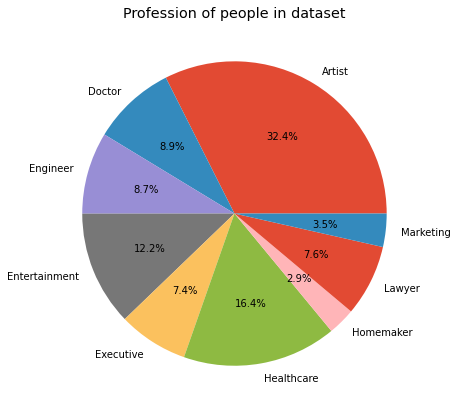

In [31]:
count=df.Profession.value_counts()
counts=count.sort_index()
counts

professions.sort()
professions

plt.figure(figsize=(7,7))
plt.pie(counts,labels=professions,autopct="%1.1f%%")
plt.title('Profession of people in dataset');

Maximum  people's are Artist in dataset

## Model Fitting

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from xgboost import XGBClassifier

#pipeline
from sklearn.pipeline import Pipeline
#metrics 
from sklearn.metrics import accuracy_score

In [33]:
#key = model name value = models object
models={"LogisticRegression":LogisticRegression(solver="liblinear"),
        "DecisionTreeClassifier":DecisionTreeClassifier(),
        "KNeighborsClassifier":KNeighborsClassifier(),
        "SVC":SVC(),
        "GaussianNB":GaussianNB(),
        "MultinomialNB":MultinomialNB(),
        "AdaBoostClassifier":AdaBoostClassifier(),
        "GradientBoostingClassifier":GradientBoostingClassifier(),
        "RandomForestClassifier":RandomForestClassifier(),
        "XGBClassifier":XGBClassifier()
       }

In [34]:
xtrain=df.drop(columns="Var_1")
ytrain=df["Var_1"]
xtest=test.drop(columns=["ID","Var_1"])
ytest=test["Var_1"]    

In [35]:
acc_result={}
for name,model in models.items():
    model_fit=model.fit(xtrain,ytrain)
    ypred=model_fit.predict(xtest)
    acc=accuracy_score(ytest,ypred)
    acc_result[name]=acc

C:\Users\RUSHIKESH\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:28:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [36]:
acc_result

{'LogisticRegression': 0.6527900797165633,
 'DecisionTreeClassifier': 0.5620017714791852,
 'KNeighborsClassifier': 0.6116031886625333,
 'SVC': 0.6536758193091231,
 'GaussianNB': 0.6479185119574845,
 'MultinomialNB': 0.6195748449955713,
 'AdaBoostClassifier': 0.6536758193091231,
 'GradientBoostingClassifier': 0.670947741364039,
 'RandomForestClassifier': 0.6727192205491586,
 'XGBClassifier': 0.6731620903454384}

In [37]:
def bestModel(model_result):
    high=0
    for name,acc in model_result.items():
        if acc>high:
            high=acc
            model_name=name
    print("Best Model is ",model_name,"with Accuracy ",high)

In [38]:
bestModel(acc_result)

Best Model is  XGBClassifier with Accuracy  0.6731620903454384


### Conclusion :
>Among all classification algorithms XGBClassifier gives high Accuracy.<br>
We use XGBClassifier for customer dataset.